## Chapter 11 A Gentle Introduction to the Random Walk

In [22]:
from random import seed
from random import randrange
from random import random
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

#### Random Series

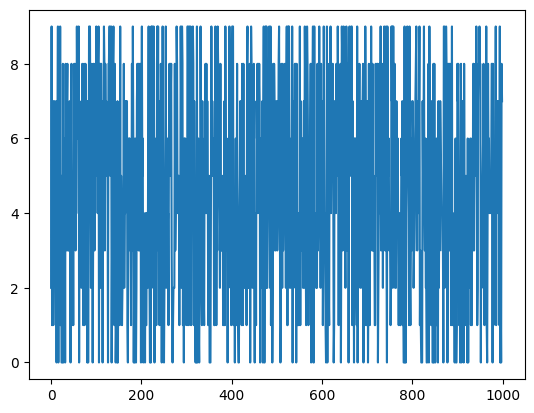

In [23]:
# create and plot a random series
seed(1)
series = [randrange(10) for i in range(1000)] # generate a random integer between 0 and 10 (exclusive)
plt.plot(series)
plt.show()

This is not a random walk. It is just a sequence of random numbers also called white noise. A common mistake that beginners make is to think that a random walk is a list of random numbers, and this is not the case at all.


#### Random Walk

A random walk is different from a list of random numbers *because the next value in the sequence is a modification of the previous value in the sequence*. The process used to generate the series forces dependence from one-time step to the next. This *dependence* provides some consistency from step-to-step rather than the large jumps that a series of independent, random numbers provides. It is this dependency that gives the process its name as a random walk or a drunkard’s walk. A simple model of a random walk is as follows:
1. Start with a random number of either -1 or 1.
2. Randomly select a -1 or 1 and add it to the observation from the previous time step.
3. Repeat step 2 for as long as you like.

More succinctly, we can describe this process as:

$y(t)=B0+B1 \times X(t-1) + e(t)$,

where $y(t)$ is the next value in the series. $B0$ is a coefficient that if set to be value other than zero adds a constant drift to the random walk. $B1$ is a coefficient to weight the previous time step and is set to 1.0. $X(t-1)$ is the observation at the previous time step. $e(t)$ is the white noise or random fluctuation at that time.

In summary, a random walk = previous value + noise. It’s non-stationary, has unit root, and permanent shocks.

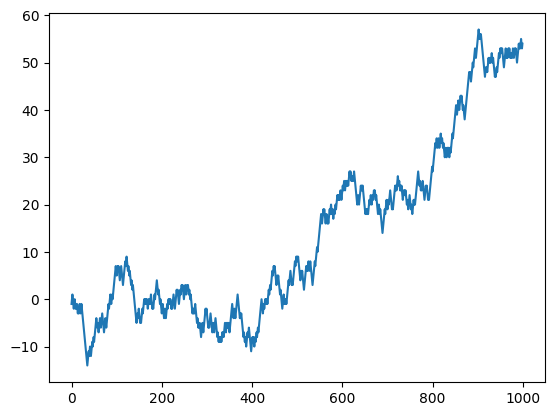

In [24]:
# create and plot a random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)

plt.plot(random_walk)
plt.show()

Running the example creates a line plot of the random walk. We can see that it looks very different from our above sequence of random numbers. In fact, the shape and movement looks like a realistic time series for the price of a security on the stock market.

#### Random Walk and Autocorrelation

We can calculate the correlation between each observation and the observations at previous time steps. A plot of these correlations is called an autocorrelation plot or a correlogram3. Given the way that the random walk is constructed, we would expect a strong autocorrelation with the previous observation and a linear fall off from there with previous lag values.

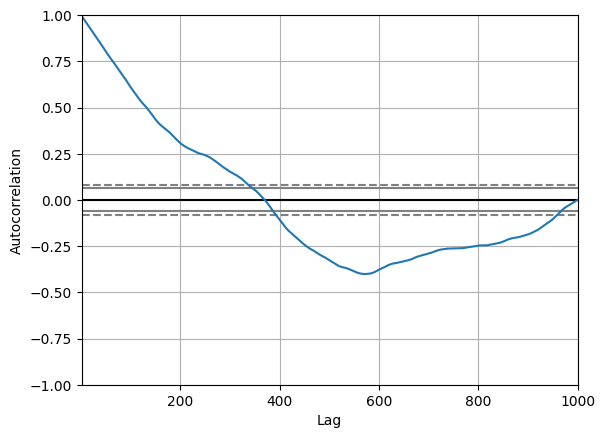

In [25]:
# plot the autocorrelation of a random walk
autocorrelation_plot(random_walk)
plt.show()

#### Random Walk and Stationarity

A stationary time series is one where the values are not a function of time. Given the way that the random walk is constructed and the results of reviewing the autocorrelation, we know that the observations in a random walk are dependent on time. The current observation is a random step from the previous observation. Therefore we can expect a random walk to be non-stationary.

All random walk processes are non-stationary. Note that not all non-stationary time series are random walks.

Additionally, a non-stationary time series does not have a consistent mean and/or variance over time.

We can perform the stationarity test using the **adfuller()** function in the Statsmodels library.

**The null hypothesis of the Augmented Dickey-Fuller (ADF) test is that the time series is non-stationary.**

In [26]:
# statistical test
from statsmodels.tsa.stattools import adfuller
result = adfuller(random_walk)
print(F'ADF Statistic: {result[0]:f}')
print(f'p-value: {result[1]:f}')
print('Critical Values:')
for key, value in result[4].items():
  print(f'\t{key}: {value:3f}')

ADF Statistic: 0.341605
p-value: 0.979175
Critical Values:
	1%: -3.436913
	5%: -2.864437
	10%: -2.568313


The test statistic value was 0.341605. This is larger than all of the critical values at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does appear to be non-stationary.

**p-value**:

The p-value is: the probability of observing results at least as extreme as what you got, if the null hypothesis were true.

Formally: p = P(data as extreme as observed | H0 is true).

The p-value tells you how consistent your data is with the null hypothesis, not the probability that the hypothesis itself is true.

We can make the random walk stationary by taking the first difference. That is replacing each observation as the difference between it and the previous value.

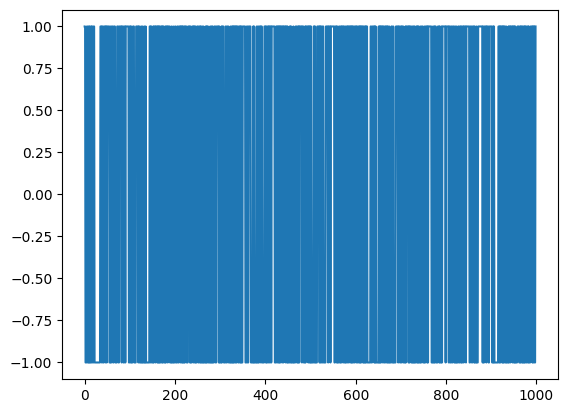

In [27]:
# calculate and plot a differenced random walk
# take difference
diff = list()
for i in range(1, len(random_walk)):
  value = random_walk[i] - random_walk[i - 1]
  diff.append(value)
# line plot
plt.plot(diff)
plt.show()

This difference graph also makes it clear that really we have no information to work with here other than a series of random moves. There is no structure to learn. Now that the time series is stationary, we can recalculate the correlogram of the differenced series.

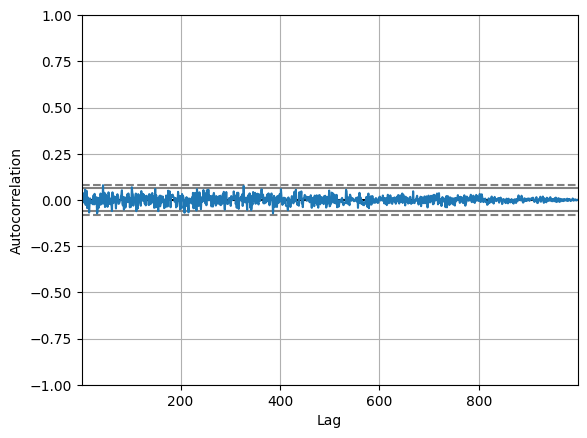

In [28]:
# autocorrelation plot
autocorrelation_plot(diff)
plt.show()

We can see no significant relationship between the lagged observations, as we would expect from the way the random walk was generated. All correlations are small, close to zero and below the 95% and 99% confidence levels (beyond a few statistical flukes).

**Note that a random walk (cumulative sum of white noise) is not stationary, even though the increments are white noise (stationary).**

#### Predicting a Random Walk

**A random walk is unpredictable**; it cannot reasonably be predicted. Given the way that the random walk is constructed, we can expect that the best prediction we could make would be to use the observation at the previous time step as what will happen in the next time step. Simply because we know that the next time step will be a function of the prior time step. This is often called the *naive forecast*, or a *persistence model*.

We can implement this in Python by first splitting the dataset into train and test sets, then using the persistence model to predict the outcome using a rolling forecast method. Once all predictions are collected for the test set, the root mean squared error (RMSE) is calculated.

In [29]:
# persistence forecasts for a random walk
from sklearn.metrics import mean_squared_error
from math import sqrt
# generate the random walk
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
  movement = -1 if random() < 0.5 else 1
  value = random_walk[i-1] + movement
  random_walk.append(value)
# prepare dataset
train_size = int(len(random_walk) * 0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
  yhat = history
  predictions.append(yhat)
  history = test[i]
# evaluate
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Persistence RMSE: {rmse:3f}')

Persistence RMSE: 1.000000


This too is expected, given that we know that the variation from one time step to the next is always going to be 1, either in the positive or negative direction.

Another error that beginners to the random walk make is to assume that if the range of error (variance) is known, then we can make predictions using a random walk generation type process. That is, if we know the error is either -1 or 1, then why not make predictions by adding a randomly selected -1 or 1 to the previous value.

In [30]:
# random predictions for a random walk
# random prediction
predictions = list()
history = train[-1]
for i in range(len(test)):
  yhat = history + (-1 if random() < 0.5 else 1)
  predictions.append(yhat)
  history = test[i]
# evaluate
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Persistence RMSE: {rmse:3f}')

Persistence RMSE: 1.328422


Running the example, we can see that indeed the algorithm results in a worse performance than the persistence method.

Persistence, or the naive forecast, is the best prediction we can make for a random walk time series.

#### Is Your Time Series a Random Walk?

Your time series may be a random walk. Some ways to check if your time series is a random walk are as follows:
- The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
- The persistence model provides the best source of reliable predictions.

This last point is key for time series forecasting. The persistence model is your “baseline yardstick.” **If your forecasting method can’t beat it, your series may be a random walk and therefore fundamentally unpredictable beyond the last observed value**.

Many time series are random walks, particularly those of security prices over time. The random walk hypothesis is a theory that stock market prices are a random walk and cannot be predicted.

A random walk is one in which future steps or directions cannot be predicted on the basis of past history. When the term is applied to the stock market, it means that short-run changes in stock prices are unpredictable.
— Page 26, A Random Walk Down Wall Street.